In [1]:
# behavior figures

# looking at bulk tuning curves in one plot for ACx and IC

#%% file import pre procesing
import pandas as pd
import numpy as np


import io 

import os
import glob
#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from matplotlib.ticker import MaxNLocator


from array import *

import math


In [2]:
# load in speadsheet with old tone detect data to show similar training time, performance, and thresholds
# new spreadsheet condensed from BDA
thresholds = pd.read_csv('fmr1_sd_thresholds_bda.csv')
thresholds

,rat_id,freq,genotype,thresh
0,Red2,4,WT,28.50
1,Red2,8,WT,18.00
2,Red2,16,WT,13.50
3,Red2,32,WT,10.00
4,Red4,4,WT,23.75
5,Red4,8,WT,23.00
6,Red4,16,WT,13.67
7,Red4,32,WT,10.25
8,Red5,4,WT,31.00
9,Red5,8,WT,31.00


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


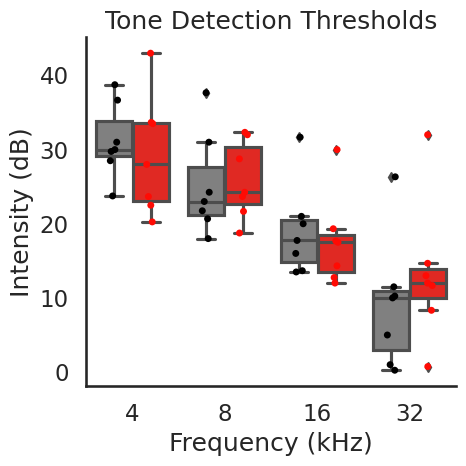

In [180]:
# plot Hit rate over training


colors = ["#808080", "#FF0B04"]
sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots(figsize=(5,5))

sns.boxplot(data=thresholds,y='thresh',x='freq',hue='genotype',ax=ax1)


colors = ["#000000", "#FF0B04"]
sns.stripplot(data=thresholds, y='thresh', x='freq', hue='genotype', 
              dodge=True, jitter=True, color='black', size=5, ax=ax1,palette=colors)

plt.ylabel('Intensity (dB)')
plt.xlabel('Frequency (kHz)')
plt.title('Tone Detection Thresholds')
sns.despine()
plt.tight_layout()
#plt.xlim([2,30])
plt.legend('',frameon=False)

plt.savefig('updated_fmr1sd_detect_tone_thresh_boxw_strip.svg',dpi=600,bbox_inches='tight')

In [32]:
detect_df = pd.read_csv('Fmr1 SD_data_exported_20240508.csv')





# Convert 'date' column to datetime type
detect_df['date'] = pd.to_datetime(detect_df['date'], format='%Y%m%d')

detect_df = detect_df.sort_values(by='date')

# Group by 'rat_id' and find the initial date for each rat
initial_dates = detect_df.groupby('rat_name')['date'].min()



# Create a new column 'initial_date' to store the initial date for each rat
detect_df['initial_date'] = detect_df['rat_name'].map(initial_dates)

# Calculate the number of days elapsed since the initial date for each row
detect_df['days_from_initial_date'] = (detect_df['date'] - detect_df['initial_date']).dt.days


In [33]:
detect_df.phase

7255        BBN
11411       BBN
11410       BBN
11409       BBN
11408       BBN
          ...  
33552    Octave
33553    Octave
33554    Octave
33555    Octave
33556    Octave
Name: phase, Length: 34081, dtype: object

In [34]:
detect_df
# get first day when task goes to 'Rxn'


# Assuming your DataFrame is named df

# Step 1: Sort the DataFrame by date for each animal
df_sorted = detect_df.groupby('rat_name').apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# Step 2: Find the first occurrence of 'Rxn' in the task column for each animal
first_rxn_indices = df_sorted.groupby('rat_name')['task'].apply(lambda x: x.eq('Rxn').idxmax())

# Step 3: Calculate the number of unique days between the first day and the first instance of 'Rxn' for each animal
unique_days = (df_sorted.loc[first_rxn_indices, 'date'] - df_sorted.groupby('rat_name')['date'].first()).dt.days

criteria_df = df_sorted.loc[first_rxn_indices]
criteria_df

/tmp/ipykernel_412522/716238183.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sorted = detect_df.groupby('rat_name').apply(lambda x: x.sort_values('date')).reset_index(drop=True)


,date,rat_name,rat_ID,DOB,Sex,Genotype,HL_date,file_name,experiment,phase,...,UUID,dprime,Freq,dB,Dur,Rxn,line,genotype,initial_date,days_from_initial_date
732,2022-02-08,Lime1,48,20210515,Male,Fmr1_SD_KO,NaN,4-32kHz_30-90dB_50ms_12s_TR500ms,Fmr1 SD,Tones,...,20220208115622_61.1640013754368_2.13383355626663,1.313242,8.0,30.0,50.0,0.980768,SD,WT,2021-12-08,62
1770,2022-01-12,Lime2,50,20210515,Male,Fmr1_SD_WT,20220802.0,4-32kHz_30-90dB_50ms_8s,Fmr1 SD,Tones,...,20220112115713_73.4000042080879_2.80720259060743,0.456299,8.0,30.0,50.0,0.715907,SD,WT,2021-12-04,39
3612,2021-10-08,Lime3,49,20210515,Male,Fmr1_SD_KO,20220817.0,BBN_20-80dB_50-300ms_4s_NG0,Fmr1 SD,BBN,...,20211008150929_59.5479972660542_2.41462205361235,0.091708,0.0,20.0,50.0,0.666067,SD,WT,2021-10-01,7
6388,2021-10-09,Lime4,51,20210515,Male,Fmr1_SD_WT,20220809.0,BBN_20-80dB_50-300ms_16s_NG0,Fmr1 SD,BBN,...,20211009134912_84.4430040568113_1.78101767019013,3.251758,0.0,70.0,300.0,0.111783,SD,WT,2021-10-01,8
8665,2022-02-26,Purple1,1,20201115,Male,Fmr1_SD_WT,20220712.0,8kHz_60dB_3catch_8s,Fmr1 SD,Octave,...,20220226152001_77.0120043307543_1.45109520854338,4.517136,NaN,NaN,NaN,NaN,SD,WT,2022-02-26,0
8769,2022-02-26,Purple2,2,20201115,Male,Fmr1_SD_WT,20220712.0,16kHz_60dB_3catch_8s,Fmr1 SD,Octave,...,20220226152008_67.4549952149391_1.93212680426164,4.101061,NaN,NaN,NaN,NaN,SD,WT,2022-02-26,0
8878,2022-02-26,Purple3,3,20201115,Male,Fmr1_SD_KO,NaN,8kHz_60dB_3catch_8s,Fmr1 SD,Octave,...,20220226152008_114.134997501969_3.20089680254563,4.690996,NaN,NaN,NaN,NaN,SD,WT,2022-02-26,0
8964,2022-02-26,Purple4,4,20201115,Male,Fmr1_SD_KO,NaN,16kHz_60dB_3catch_16s,Fmr1 SD,Octave,...,20220226152008_173.023000359535_2.60164651760399,4.116160,NaN,NaN,NaN,NaN,SD,WT,2022-02-26,0
9053,2021-10-01,Red1,27,20210515,Male,Fmr1_SD_KO,20220809.0,BBN_30-90dB_50-300ms_16s_NG0,Fmr1 SD,BBN,...,20211001124706_70.3969929367304_1.00186309184683,3.330877,0.0,80.0,300.0,0.112162,SD,WT,2021-10-01,0
12009,2021-10-18,Red2,28,20210515,Male,Fmr1_SD_WT,NaN,BBN_20-80dB_50-300ms_4s_NG0,Fmr1 SD,BBN,...,20211018115928_263.773000985384_2.12087491188998,3.041573,0.0,40.0,100.0,0.304526,SD,WT,2021-10-01,17


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


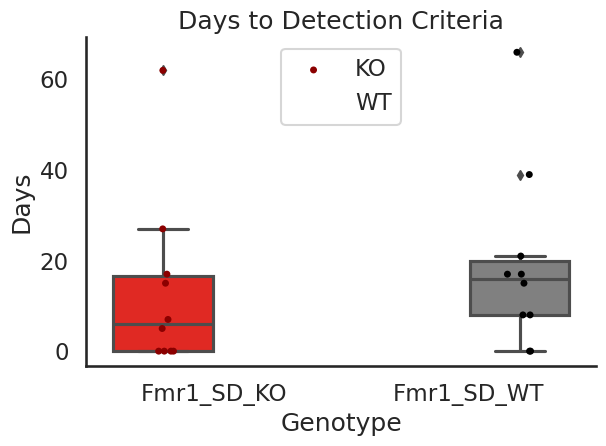

In [23]:
# plot Hit rate over training

sns.set_context("talk")
sns.set_style("white")


fig1,ax1 = plt.subplots()

colors = ["#8B0000", "#000000"]
sns.set_palette(sns.color_palette(colors))

sns.stripplot(data=criteria_df,y='days_from_initial_date',x='Genotype',hue='Genotype',dodge=True)

colors = ["#FF0B04", "#808080"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=criteria_df,y='days_from_initial_date',x='Genotype',hue='Genotype')

plt.ylabel('Days')
plt.xlabel('Genotype')
plt.title('Days to Detection Criteria')
sns.despine()
plt.tight_layout()
#plt.legend('',frameon=False)
plt.legend(loc='upper center',labels = ['KO','WT'])
#plt.axhline(y=0.2,linestyle='--',color='gray')
#plt.axhline(y=0.9,linestyle='--',color='gray')
#plt.savefig('days_detection.svg',dpi=600)



In [ ]:
# q-value stats
from scipy.stats import ranksums

# first compare within each q value between genotypes
wt_data = criteria_df[criteria_df['Genotype'] == 'Fmr1_SD_WT']['days_from_initial_date']
ko_data = criteria_df[criteria_df['Genotype'] == 'Fmr1_SD_KO']['days_from_initial_date']

statistic, p_value = ranksums(wt_data, ko_data)

# Print results
print("Wilcoxon Rank-Sum WT/KO Days to Criteria Detection:")
print("Statistic:", statistic)
print("p-value:", p_value)





/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

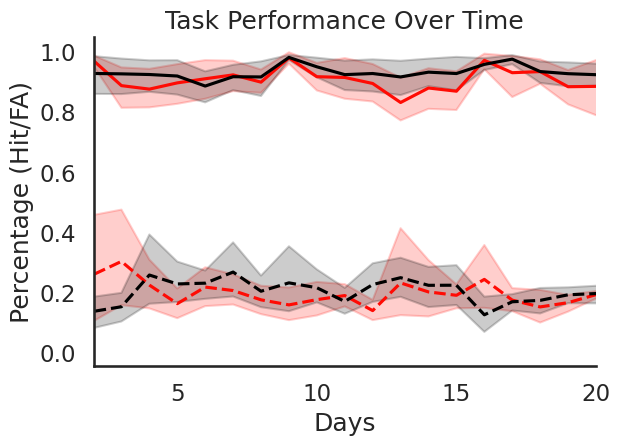

In [24]:
# plot Hit rate over training
colors = ["#FF0B04", "#000000"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots()
#colors = ["#000000","#FF0B04" ]
#sns.set_palette(sns.color_palette(colors))

rat_grouped_df = detect_df[['file_name','rat_name','days_from_initial_date','dprime']]

rat_grouped_df = detect_df.groupby(['file_name','rat_name','days_from_initial_date']).first()

#detect_df_2 = detect_df.loc[detect_df['task'] == 'Training']
#detect_df_2 = detect_df_2.loc[detect_df_2['detail'] == 'Normal']

sns.lineplot(data=rat_grouped_df,y='hit_percent',x='days_from_initial_date',hue='Genotype')
sns.lineplot(data=rat_grouped_df,y='FA_percent',x='days_from_initial_date',hue='Genotype',linestyle='--')
plt.ylabel('Percentage (Hit/FA)')
plt.xlabel('Days')
plt.title('Task Performance Over Time')
sns.despine()
plt.tight_layout()
plt.xlim([2,20])
plt.legend('',frameon=False)
#plt.legend(loc='upper right')


#plt.axhline(y=0.2,linestyle='--',color='gray')
#plt.axhline(y=0.9,linestyle='--',color='gray')
#plt.savefig('task_performance_time_behavior.svg')


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

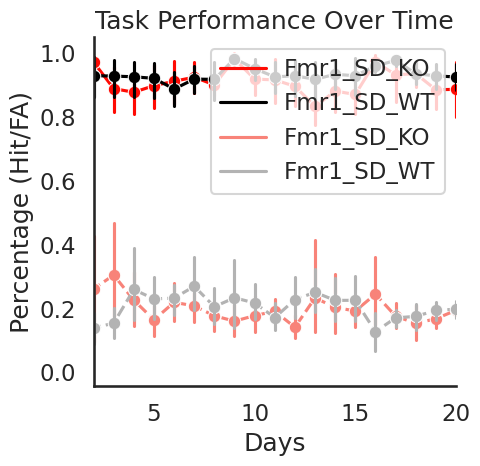

In [137]:
# plot Hit rate over training
colors = ["#FF0B04", "#000000"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))


fig1,ax1 = plt.subplots(figsize=(5,5))
#colors = ["#000000","#FF0B04" ]
#sns.set_palette(sns.color_palette(colors))

rat_grouped_df = detect_df[['file_name','rat_name','days_from_initial_date','dprime']]

rat_grouped_df = detect_df.groupby(['file_name','rat_name','days_from_initial_date']).first()

#detect_df_2 = detect_df.loc[detect_df['task'] == 'Training']
#detect_df_2 = detect_df_2.loc[detect_df_2['detail'] == 'Normal']

sns.lineplot(data=rat_grouped_df,y='hit_percent',x='days_from_initial_date',hue='Genotype',err_style='bars',marker='o')

colors = ["#F88379", "#B3B3B3"]
sns.set_palette(sns.color_palette(colors))

sns.lineplot(data=rat_grouped_df,y='FA_percent',x='days_from_initial_date',hue='Genotype',linestyle='--',err_style='bars',marker='o')
plt.ylabel('Percentage (Hit/FA)')
plt.xlabel('Days')
plt.title('Task Performance Over Time')
sns.despine()
plt.tight_layout()
plt.xlim([2,20])
plt.legend('',frameon=False)
plt.legend(loc='upper right')


#plt.axhline(y=0.2,linestyle='--',color='gray')
#plt.axhline(y=0.9,linestyle='--',color='gray')
#plt.savefig('task_performance_time_behavior.svg')


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

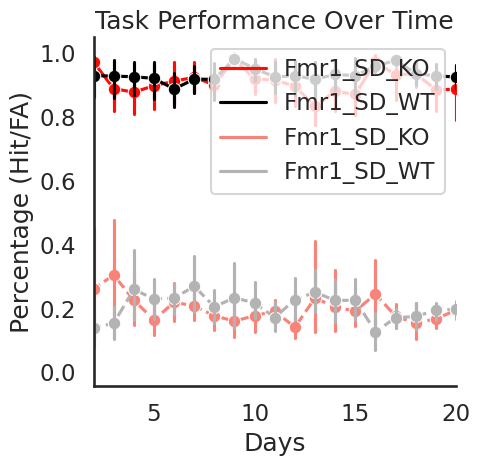

In [17]:
# plot Hit rate over training
colors = ["#FF0B04", "#000000"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))


fig1,ax1 = plt.subplots(figsize=(5,5))
#colors = ["#000000","#FF0B04" ]
#sns.set_palette(sns.color_palette(colors))

rat_grouped_df = detect_df[['file_name','rat_name','days_from_initial_date','dprime']]

rat_grouped_df = detect_df.groupby(['file_name','rat_name','days_from_initial_date']).first()

#detect_df_2 = detect_df.loc[detect_df['task'] == 'Training']
#detect_df_2 = detect_df_2.loc[detect_df_2['detail'] == 'Normal']

sns.lineplot(data=rat_grouped_df,y='hit_percent',x='days_from_initial_date',hue='Genotype',err_style='bars',marker='o')

colors = ["#F88379", "#B3B3B3"]
sns.set_palette(sns.color_palette(colors))

sns.lineplot(data=rat_grouped_df,y='FA_percent',x='days_from_initial_date',hue='Genotype',linestyle='--',err_style='bars',marker='o')
plt.ylabel('Percentage (Hit/FA)')
plt.xlabel('Days')
plt.title('Task Performance Over Time')
sns.despine()
plt.tight_layout()
plt.xlim([2,20])
plt.legend('',frameon=False)
plt.legend(loc='upper right')


#plt.axhline(y=0.2,linestyle='--',color='gray')
#plt.axhline(y=0.9,linestyle='--',color='gray')
#plt.savefig('task_performance_time_behavior.svg')


In [124]:
rat_grouped_df

date  \
file_name                            rat_name days_from_initial_date              
16kHz_57dB_8kHz_70dB_300ms_8s_c5_NG3 Lime4    218                    2022-05-07   
                                              223                    2022-05-12   
                                              228                    2022-05-17   
                                              232                    2022-05-21   
                                              235                    2022-05-24   
...                                                                         ...   
8kHz_68dB_4kHz_70dB_300ms_16s_c5_NG3 Teal3    299                    2022-07-27   
8kHz_70dB_16kHz_57dB_300ms_8s_c5_NG3 Lime4    251                    2022-06-09   
                                              252                    2022-06-10   
                                              253                    2022-06-11   
                                              255                    2022-06-13   

                                                                      rat_ID  \
file_name                            rat_name days_from_initial_date           
16kHz_57dB_8kHz_70dB_300ms_8s_c5_NG3 Lime4    218                         51   
                                              223                         51   
                                              228                         51   
                                              232                         51   
                                              235                         51   
...                                                                      ...   
8kHz_68dB_4kHz_70dB_300ms_16s_c5_NG3 Teal3    299                         56   
8kHz_70dB_16kHz_57dB_300ms_8s_c5_NG3 Lime4    251                         51   
                                              252                         51   
                                              253                         51   
                                              255                         51   

                                                                           DOB  \
file_name                            rat_name days_from_initial_date             
16kHz_57dB_8kHz_70dB_300ms_8s_c5_NG3 Lime4    218                     20210515   
                                              223                     20210515   
                                              228                     20210515   
                                              232                     20210515   
                                              235                     20210515   
...                                                                        ...   
8kHz_68dB_4kHz_70dB_300ms_16s_c5_NG3 Teal3    299                     20210515   
8kHz_70dB_16kHz_57dB_300ms_8s_c5_NG3 Lime4    251                     20210515   
                                              252                     20210515   
                                              253                     20210515   
                                              255                     20210515   

                                                                       Sex  \
file_name                            rat_name days_from_initial_date         
16kHz_57dB_8kHz_70dB_300ms_8s_c5_NG3 Lime4    218                     Male   
                                              223                     Male   
                                              228                     Male   
                                              232                     Male   
                                              235                     Male   
...                                                                    ...   
8kHz_68dB_4kHz_70dB_300ms_16s_c5_NG3 Teal3    299                     Male   
8kHz_70dB_16kHz_57dB_300ms_8s_c5_NG3 Lime4    251                     Male   
                                              252                     Male   
                             

In [28]:
rat_grouped_df_hit_fa = rat_grouped_df.reset_index()
rat_grouped_df_hit_fa = rat_grouped_df_hit_fa.groupby(['Genotype','rat_name']).agg({'hit_percent':'mean','FA_percent':'mean'})
rat_grouped_df_hit_fa = rat_grouped_df_hit_fa.reset_index()
rat_grouped_df_hit_fa['Genotype'] = rat_grouped_df_hit_fa['Genotype'].replace({'Fmr1_SD_WT': 'WT', 'Fmr1_SD_KO': 'KO'})

/tmp/ipykernel_258848/187250918.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=rat_grouped_df_hit_fa, y='hit_percent_perc', x='Genotype',
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


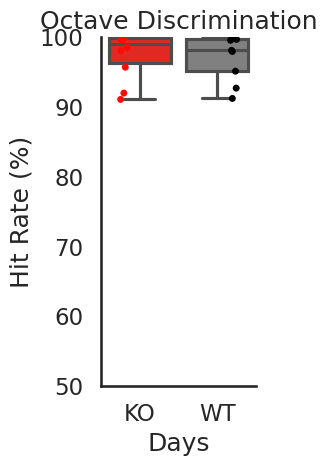

In [183]:
# plot Hit rate over training
colors = ["#FF0B04", "#808080"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))
rat_grouped_df_hit_fa['hit_percent_perc'] = rat_grouped_df_hit_fa['hit_percent']*100

fig1,ax1 = plt.subplots(figsize=(3,5))

sns.boxplot(data=rat_grouped_df_hit_fa,y='hit_percent_perc',x='Genotype')
colors = ["#FF0B04", "#000000"]
sns.stripplot(data=rat_grouped_df_hit_fa, y='hit_percent_perc', x='Genotype', 
              dodge=True, jitter=True, color='black', size=5, ax=ax1,palette=colors)


plt.ylabel('Hit Rate (%)')
plt.title('Octave Discrimination')
sns.despine()
plt.tight_layout()
plt.ylim([50,100])
#plt.xlim([2,20])
plt.legend('',frameon=False)
#plt.legend(loc='upper right')
plt.savefig('hit_oct_disc_box.svg',dpi=600,bbox_inches='tight')

/tmp/ipykernel_258848/3350599824.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=rat_grouped_df_hit_fa, y='FA_percent_perc', x='Genotype',
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


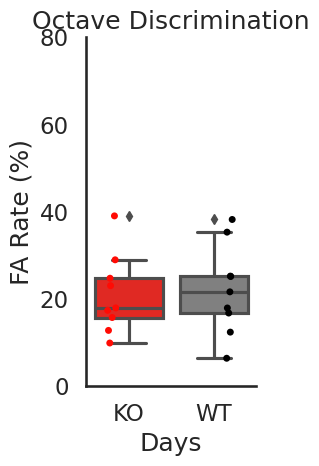

In [187]:
# plot Hit rate over training
colors = ["#FF0B04", "#808080"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))
rat_grouped_df_hit_fa['FA_percent_perc'] = rat_grouped_df_hit_fa['FA_percent']*100
rat_grouped_df_hit_fa = rat_grouped_df_hit_fa.loc[rat_grouped_df_hit_fa['FA_percent_perc'] < 70]
fig1,ax1 = plt.subplots(figsize=(3,5))

sns.boxplot(data=rat_grouped_df_hit_fa,y='FA_percent_perc',x='Genotype')
colors = ["#FF0B04", "#000000"]
sns.stripplot(data=rat_grouped_df_hit_fa, y='FA_percent_perc', x='Genotype', 
              dodge=True, jitter=True, color='black', size=5, ax=ax1,palette=colors)

plt.ylabel('FA Rate (%)')
plt.title('Octave Discrimination')
sns.despine()
plt.tight_layout()
plt.ylim([0,80])
#plt.xlim([2,20])
plt.legend('',frameon=False)
#plt.legend(loc='upper right')
plt.savefig('fa_oct_disc_box.svg',dpi=600,bbox_inches='tight')


In [1]:
# days to criteria
criteria_2 = pd.read_csv('Fmr1 SD Training data_2024-12-06.csv')


NameError: name 'pd' is not defined

/tmp/ipykernel_258848/215605498.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=criteria_2, y='days', x='Genotype',
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


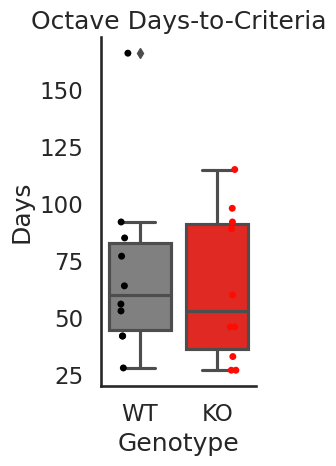

In [190]:
# plot Hit rate over training
colors = ["#808080","#FF0B04"]

sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots(figsize=(3,5))
criteria_2 = criteria_2.loc[criteria_2['detail'] == 'Normal']
sns.boxplot(data=criteria_2,y='days',x='Genotype')
colors = ["#000000", "#FF0B04"]
sns.stripplot(data=criteria_2, y='days', x='Genotype', 
              dodge=True, jitter=True, color='black', size=5, ax=ax1,palette=colors)

plt.ylabel('Days')
plt.title('Octave Days-to-Criteria')
sns.despine()
plt.tight_layout()
#plt.ylim([50,100])
#plt.xlim([2,20])
plt.legend('',frameon=False)
#plt.legend(loc='upper right')
plt.savefig('criteria_oct_disc_box.svg',dpi=600,bbox_inches='tight')


In [3]:
big_df = pd.read_csv('Fmr1_SD_Octave_20240426.csv')
big_df

,date,time,box,rat_name,rat_ID,weight,file_name,assigned_file_name,experiment,phase,...,DOB,Sex,Genotype,HL_date,HL,HL_state,octave_fraction,octave_steps,Type,Range
0,2022-04-01,145357,5,Purple1,1,484,BAD_FILENAME,8-4kHz_60dB_300ms_8s,Fmr1 SD,Octave,...,20201115,Male,WT,2022-07-12,-1,baseline,NaN,NaN,Error,NaN
1,2022-04-01,145357,5,Purple1,1,484,BAD_FILENAME,8-4kHz_60dB_300ms_8s,Fmr1 SD,Octave,...,20201115,Male,WT,2022-07-12,-1,baseline,NaN,NaN,Error,NaN
2,2022-04-01,145357,5,Purple1,1,484,BAD_FILENAME,8-4kHz_60dB_300ms_8s,Fmr1 SD,Octave,...,20201115,Male,WT,2022-07-12,-1,baseline,NaN,NaN,Error,NaN
3,2022-04-01,145357,5,Purple1,1,484,BAD_FILENAME,8-4kHz_60dB_300ms_8s,Fmr1 SD,Octave,...,20201115,Male,WT,2022-07-12,-1,baseline,NaN,NaN,Error,NaN
4,2022-04-01,145357,5,Purple1,1,484,BAD_FILENAME,8-4kHz_60dB_300ms_8s,Fmr1 SD,Octave,...,20201115,Male,WT,2022-07-12,-1,baseline,NaN,NaN,Error,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,2022-07-02,131619,8,Teal6,58,433,8-11.3kHz_60dB_300ms_16s_NG3,8-11.3kHz_60dB_300ms_16s,Fmr1 SD,Octave,...,20210515,Male,KO,NaN,-1,baseline,-0.250052,3.0,Zoom,2-6
1967,2022-07-02,131619,8,Teal6,58,433,8-11.3kHz_60dB_300ms_16s_NG3,8-11.3kHz_60dB_300ms_16s,Fmr1 SD,Octave,...,20210515,Male,KO,NaN,-1,baseline,-0.333281,4.0,Zoom,2-6
1968,2022-07-02,131619,8,Teal6,58,433,8-11.3kHz_60dB_300ms_16s_NG3,8-11.3kHz_60dB_300ms_16s,Fmr1 SD,Octave,...,20210515,Male,KO,NaN,-1,baseline,-0.416705,5.0,Zoom,2-6
1969,2022-07-02,131619,8,Teal6,58,433,8-11.3kHz_60dB_300ms_16s_NG3,8-11.3kHz_60dB_300ms_16s,Fmr1 SD,Octave,...,20210515,Male,KO,NaN,-1,baseline,-0.500037,6.0,Zoom,2-6


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

(0.0, 10.0)

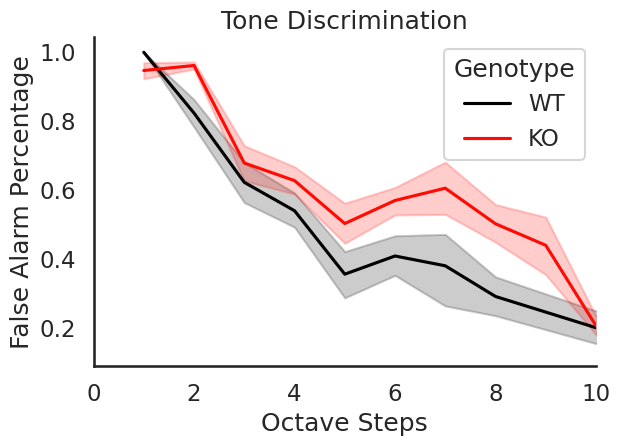

In [4]:
# both broad and zoom together 
colors = ["#000000","#FF0B04" ]
sns.set_context("talk")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots()


big_df_2 = big_df.loc[big_df['detail'] == 'Normal']


sns.lineplot(data=big_df_2,y='FA_percent_detailed',x='octave_steps',hue='Genotype',err_style='band')

plt.ylabel('False Alarm Percentage')
plt.xlabel('Octave Steps')
plt.title('Tone Discrimination')
sns.despine()
plt.tight_layout()
plt.xlim([0,10])



/tmp/ipykernel_644132/972287142.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_2['oct_abs'] = big_df_2['octave_steps']/12
/tmp/ipykernel_644132/972287142.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_2['rt_ms'] = big_df_2['reaction']*1000
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

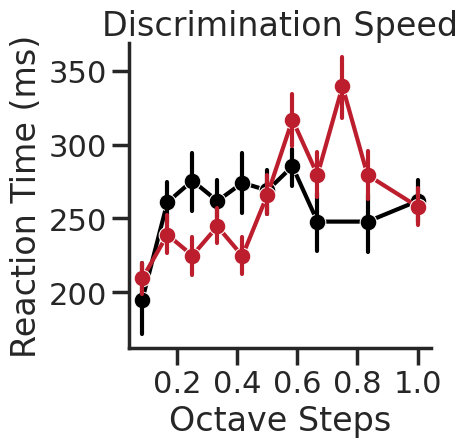

In [24]:
# both broad and zoom together 
colors = ["#000000","#BC1E2E" ]
sns.set_context("poster")
sns.set_style("ticks")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots(figsize=(5,5))




big_df_2 = big_df.loc[big_df['detail'] == 'Normal']
big_df_2['oct_abs'] = big_df_2['octave_steps']/12
big_df_2['rt_ms'] = big_df_2['reaction']*1000
sns.lineplot(data=big_df_2,y='reaction',x='oct_abs',hue='Genotype',err_style='bars',marker='o')
#sns.lineplot(data=big_df_2,y='FA_percent_detailed',x='oct_abs',hue='Genotype',err_style='bars',marker='o')

plt.ylabel('Reaction Time (ms)')
plt.xlabel('Octave Steps')
plt.title('Discrimination Speed')
sns.despine()
plt.tight_layout()
plt.xticks([0.2,0.4,0.6,0.8,1])
plt.yticks([200,250,300,350])
plt.legend([],[], frameon=False)

plt.savefig('reviewer_figure2.svg',dpi=600,bbox_inches='tight')

/tmp/ipykernel_258848/3596724608.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_2['oct_abs'] = big_df_2['octave_steps']/12
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/au

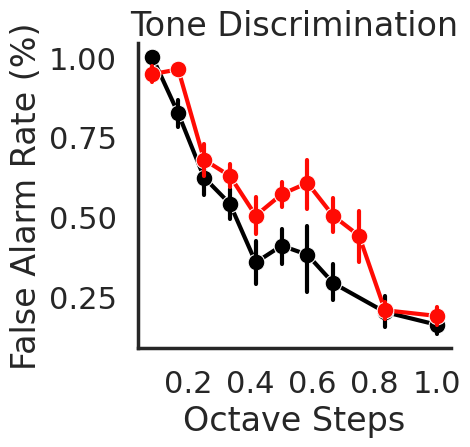

In [77]:
# both broad and zoom together 
colors = ["#000000","#FF0B04" ]
sns.set_context("poster")
sns.set_style("white")

sns.set_palette(sns.color_palette(colors))

fig1,ax1 = plt.subplots(figsize=(5,5))




big_df_2 = big_df.loc[big_df['detail'] == 'Normal']
big_df_2['oct_abs'] = big_df_2['octave_steps']/12

#sns.lineplot(data=big_df_2,y='FA_percent_detailed',x='octave_steps',hue='Genotype',err_style='bars',marker='o')
sns.lineplot(data=big_df_2,y='FA_percent_detailed',x='oct_abs',hue='Genotype',err_style='bars',marker='o')

plt.ylabel('False Alarm Rate (%)')
plt.xlabel('Octave Steps')
plt.title('Tone Discrimination')
sns.despine()
plt.tight_layout()
plt.xticks([0.2,0.4,0.6,0.8,1])
#plt.xlim([0,10])
plt.legend([],[], frameon=False)

plt.savefig('fmr1sd_oct_disc_dec_xaxis.svg',dpi=600,bbox_inches='tight')